# Examen final



En este examen final tendremos 10 preguntas para evaluar el nivel de comprensión de la materia impartida. Una vez finalizado, enviadme las respuestas por correo. Son 5 preguntas test y 5 preguntas de rellenar código.

Las test respondedlas poniendo en el markdown vuestra respuesta, solo hay una correcta.

Cada pregunta suma un punto, y para aprobar necesitáis sumar 10 puntos. Podéis programar lo que queráis mientras lo realizais.

## Librerías

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
import numpy as np

# Pregunta 1

¿Cuál de los siguientes vectores no puede ser un estado cuántico?



1.   $0.3|0\rangle + 0.1|1\rangle -0.15i|2\rangle +0.93675|3\rangle$
2.   $(0.3+0.5i)|0\rangle + 0.1i|1\rangle +0.806|3\rangle$
3.   $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$
4.   $ 0.7|0\rangle - 0.2|1\rangle -0.4i|2\rangle +0.2|3\rangle$



**Respuesta:**
Para que un vector sea un estado cuántico la suma de los cuadrados de las magnitudes de los coeficientes debe ser 1. Por lo que el vector número 4 **NO** es un estado cuántico:
0.49 + 0.04 + 0.16 + 0.04 = 0.73

# Pregunta 2

Selecciona la frase falsa.

1. $A=(\begin{matrix}1&2+i\\2-i&1\end{matrix})$ es hermítica.
2. $U = (\begin{matrix}0&i\\-i&0\end{matrix})$ es unitaria.
3. Si $A = 1|0\rangle\langle 1| + 1|1\rangle\langle 0|$ , entonces $A|0\rangle = |0\rangle$.
4. Una matriz unitaria puede ser hermítica.

**Respuesta**: La frase falsa es la número 3 porque el resultado correcto es $A|0\rangle = |1\rangle$

# Pregunta 3

Dado el estado cuántico $0.3|0\rangle + 0.1|1\rangle -0.15i|2\rangle +0.93675|3\rangle$, ¿cuál es la probabilidad de medir $|1\rangle$?

1. 0.1
2. 0.01
3. 0.1i
4. 0.2

**Respuesta:** La probabilidad de medir 1 es la magnitud al cuadrado del coeficiente, luego la respuesta correcta es la número 2. 0.01

# Pregunta 4

Selecciona la frase correcta.

1. Para la teleportación cuántica no hace falta mover ningún qubit nunca.
2. En la teleportación cuántica se comunica información instantáneamente.
3. Para recuperar el estado cuántico en la teleportación cuántica hay que corregir el qubit del que recibe el estado según las mediciones del que lo envía.
4. La teleportación cuántica requiere 4 qubits.

**Respuesta:** La respuesta correcta es la número 3 porque el receptor ha de aplicar una puerta cuántica al qúbit entrelazado para reconstruir el estado original.

# Pregunta 5

Selecciona la frase falsa.

1. Los errores cuánticos siempre están presentes en ordenadores cuánticos reales.
2. Se pueden reducir los errores cuánticos con protocolos existentes.
3. El algoritmo de Deustch-Jozsa requiere varias mediciones en un caso ideal.
4. El algoritmo de Grover no devuelve siempre la solución que buscamos.
5. El Hadamard Test permite obtener el valor esperado de un operador respecto a un estado.


**Respuesta:** La frase falsa es la número 3, porque el algoritmo de Deustch-Jozsa precisamente con una sola ejecución, incluyendo una sola medición final de todos los qúbits, se puede determinar si la función dada es constante o balanceada.

# Pregunta 6

Crea el siguiente circuito

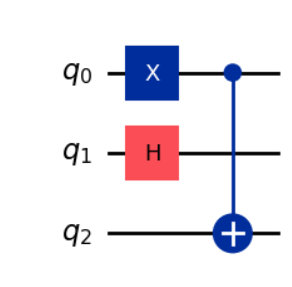

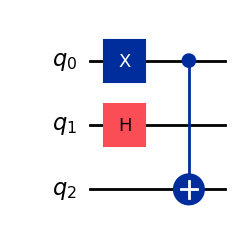

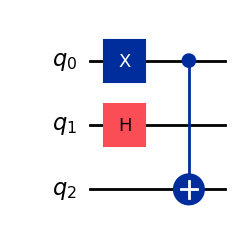

In [2]:
qr = QuantumRegister(3, name='q')
qc = QuantumCircuit(qr, name='Circuit')

qc.x(qr[0])
qc.h(qr[1])
qc.cx(qr[0], qr[2])
qc.draw('mpl')

# Pregunta 7

Crea el siguiente circuito (fíjate en los nombres y en los objetivos de las mediciones)

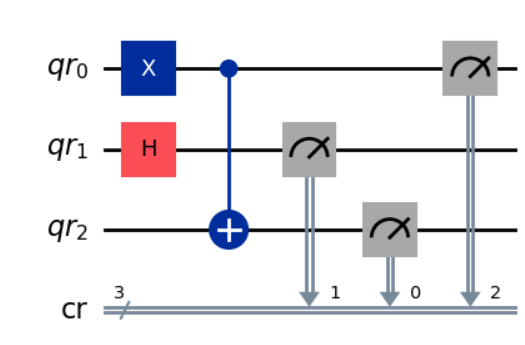

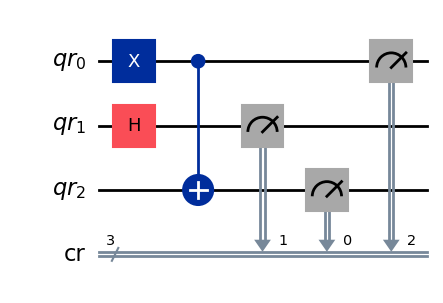

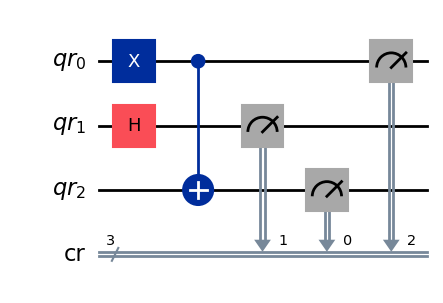

In [3]:
qr = QuantumRegister(3, name='qr')
cr = ClassicalRegister(3, name='cr')
qc = QuantumCircuit(qr, cr, name='Circuit')

qc.x(qr[0])
qc.h(qr[1])
qc.cx(qr[0], qr[2])

qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[0])
qc.measure(qr[0], cr[2])
qc.draw('mpl')

# Pregunta 8

Crea el siguiente circuito condicional

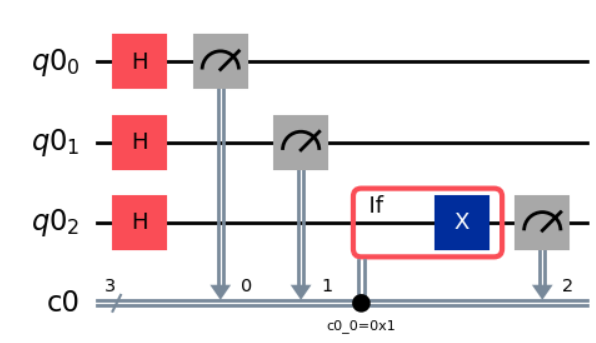

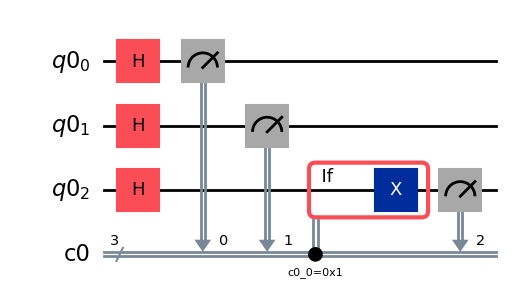

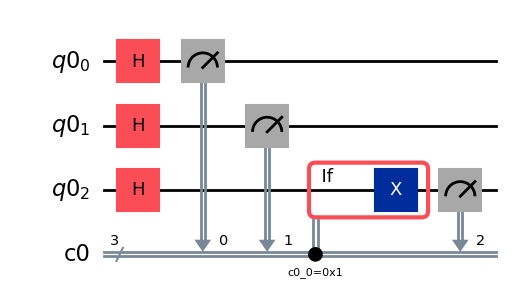

In [5]:
qr = QuantumRegister(3, name='q0')
cr = ClassicalRegister(3, name='c0')
qc = QuantumCircuit(qr, cr, name='Circuit')

qc.h(qr[:])
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

with qc.if_test((cr[0], 1)):
    qc.x(qr[2])

qc.measure(qr[2], 2)

qc.draw('mpl')

# Pregunta 9

Crea el siguiente circuito como una puerta.

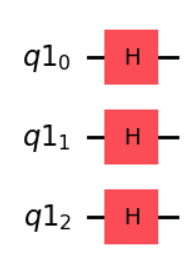

y añádela a un circuito, de forma que se vea

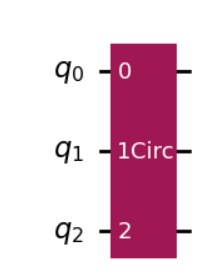

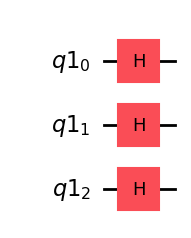

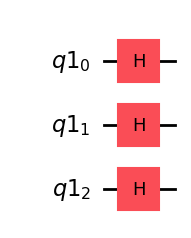

In [10]:
n = 3
qr = QuantumRegister(n, name='q1')
qc = QuantumCircuit(qr, name='Circuit')

qc.h(qr[:])
qc.draw('mpl')

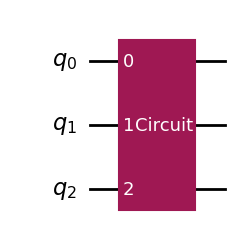

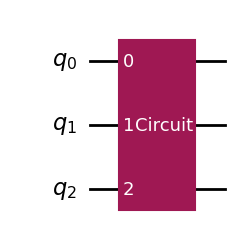

In [11]:
gate = qc.to_gate()
qc1 = QuantumCircuit(n)
qc1.append(gate, range(n))
qc1.draw('mpl')

# Pregunta 10

Haz cualquier circuito de 2 qubits, y ejecútalo, de forma que puedas printear su histograma.

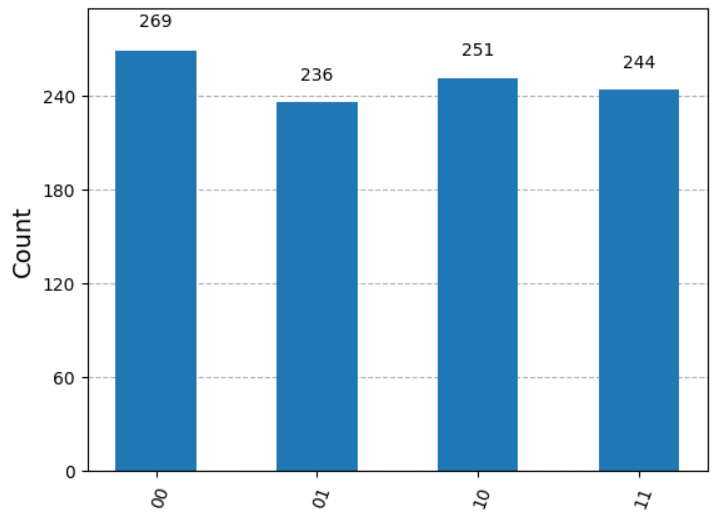

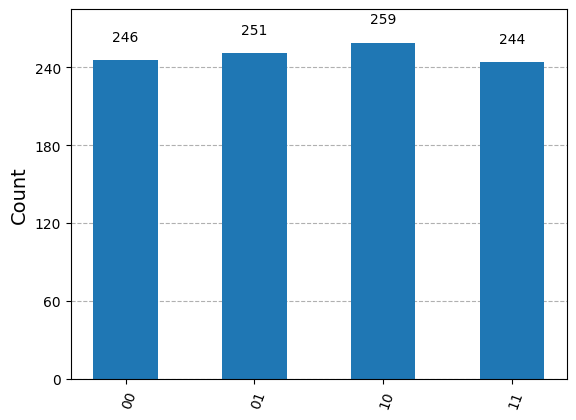

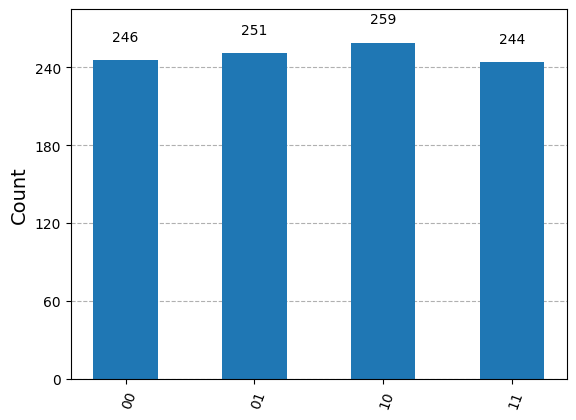

In [12]:
n = 2
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qr, cr)
qc.h(qr[:])
qc.cx(qr[0], qr[1])
qc.measure(range(n), range(n))

backend = GenericBackendV2(num_qubits=n)
qc_transpiled = transpile(qc, backend)
job = backend.run(qc_transpiled, shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)